# Introduction
### Flipkart is a well-known online book retailer in India that began operations in 2007. Since then, Flipkart has grown to dominate a wide range of products, including electronics, apparel, household goods, and other necessities. 

### I have chosen Flipkart Laptops Dataset in this dataset I have ProductName, Stars, Ratings, Review, MRP, CurrentPrice, Processor, RAM, Storage and ImageURL.


# Problem
### The problem that the company is currently confronting is that they are at the same level with Amazon and Snapdeal(Another e-commerce platform in India) in the sale of electronics and hence Flipkart wants to increase its sales so that they can become the No.1 e-commerce market place also the MRP(Maximum Retail Price) of the Laptops are too high which will lead to get less sales.

# Data Collection
### Importing necessary Libraries and uploading the dataset using pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Flipkart laptops_info.csv', error_bad_lines=False)
data.head()

<ipython-input-2-7366603aea29>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Flipkart laptops_info.csv', error_bad_lines=False)
b'Skipping line 116: expected 10 fields, saw 17\nSkipping line 117: expected 10 fields, saw 17\nSkipping line 141: expected 10 fields, saw 14\nSkipping line 145: expected 10 fields, saw 15\nSkipping line 168: expected 10 fields, saw 12\nSkipping line 195: expected 10 fields, saw 14\nSkipping line 250: expected 10 fields, saw 12\nSkipping line 279: expected 10 fields, saw 12\nSkipping line 311: expected 10 fields, saw 19\nSkipping line 455: expected 10 fields, saw 12\nSkipping line 467: expected 10 fields, saw 13\nSkipping line 470: expected 10 fields, saw 12\nSkipping line 516: expected 10 fields, saw 11\nSkipping line 520: expected 10 fields, saw 19\nSkipping line 583: expected 10 fields, saw 13\n'


,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
0,Lenovo IdeaPad 3 Core i3 10th Gen,4.3,8,0,31990,53790,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,Lenovo Intel Celeron Dual Core,4.1,366,35,28490,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


# Data Exploration

### Checking the shape, missing values, visualisation of missing data using heatmap, info, descriptive statistics and the data types.

In [ ]:
data.shape    #Checking the shape of the dataset

(681, 10)

In [ ]:
data.isnull().sum()   #Checking missing values in columns

ProductName      0
Stars            0
Ratings          0
Reviews          0
Current_Price    0
MRP              0
Proccessor       0
Ram              0
Storage          0
ImageURL         0
dtype: int64

In [ ]:
data.info()   #Checking the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    681 non-null    object 
 1   Stars          681 non-null    float64
 2   Ratings        681 non-null    int64  
 3   Reviews        681 non-null    int64  
 4   Current_Price  681 non-null    int64  
 5   MRP            681 non-null    int64  
 6   Proccessor     681 non-null    object 
 7   Ram            681 non-null    object 
 8   Storage        681 non-null    object 
 9   ImageURL       681 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 53.3+ KB


In [ ]:
data.describe()   #Checking the descriptive statistics of the dataset.

,Stars,Ratings,Reviews,Current_Price,MRP
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,3.393392,817.650514,102.396476,48240.491924,62572.709251
std,1.644590,1909.163189,242.605686,13941.846996,19504.876499
min,0.000000,0.000000,0.000000,15990.000000,0.000000
25%,3.700000,8.000000,0.000000,37250.000000,50000.000000
50%,4.200000,78.000000,10.000000,47990.000000,61590.000000
75%,4.300000,505.000000,61.000000,59990.000000,76473.000000
max,5.000000,17745.000000,2300.000000,102000.000000,136990.000000


In [ ]:
data.dtypes     #Checking the data types of each column.

ProductName       object
Stars            float64
Ratings            int64
Reviews            int64
Current_Price      int64
MRP                int64
Proccessor        object
Ram               object
Storage           object
ImageURL          object
dtype: object

### Visualisation of the missing values in the dataset using heatmap.

<AxesSubplot:>

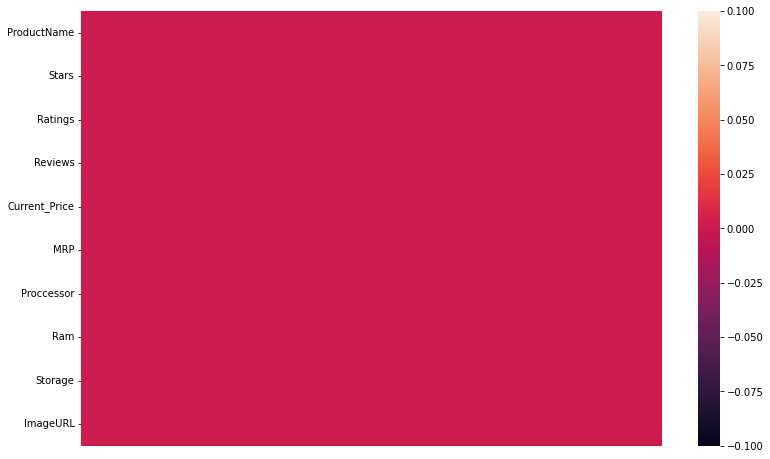

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(data.isna().transpose(),xticklabels=False)

## It's clear that the above dataset doesn't have any missing values.

# Data Visualisation

### We will remove the unwanted columns from our dataset then we will check the value counts for each column

In [ ]:
data = data.drop('ImageURL', axis=1)  #Removing the ImageURL columns as it is not a useful column.

 ### Counting the values of stars column to check the highest rating.

In [ ]:
print(data['Stars'].value_counts()) 

0.0    126
4.3    113
4.4     86
4.2     83
4.0     56
4.1     49
4.5     41
3.8     21
3.9     20
3.5     18
3.7     17
4.6     11
3.3      9
5.0      7
3.6      6
4.7      4
3.4      4
2.9      3
3.1      2
4.8      2
4.9      1
3.0      1
3.2      1
Name: Stars, dtype: int64


### Changing the name of the Processor column as the spelling is incorrect.

In [ ]:
data = data.rename(columns={'Proccessor': 'Processor'})

### Checking the distribution of the Current Price and MRP column using the line chart to check the differences between both the columns.

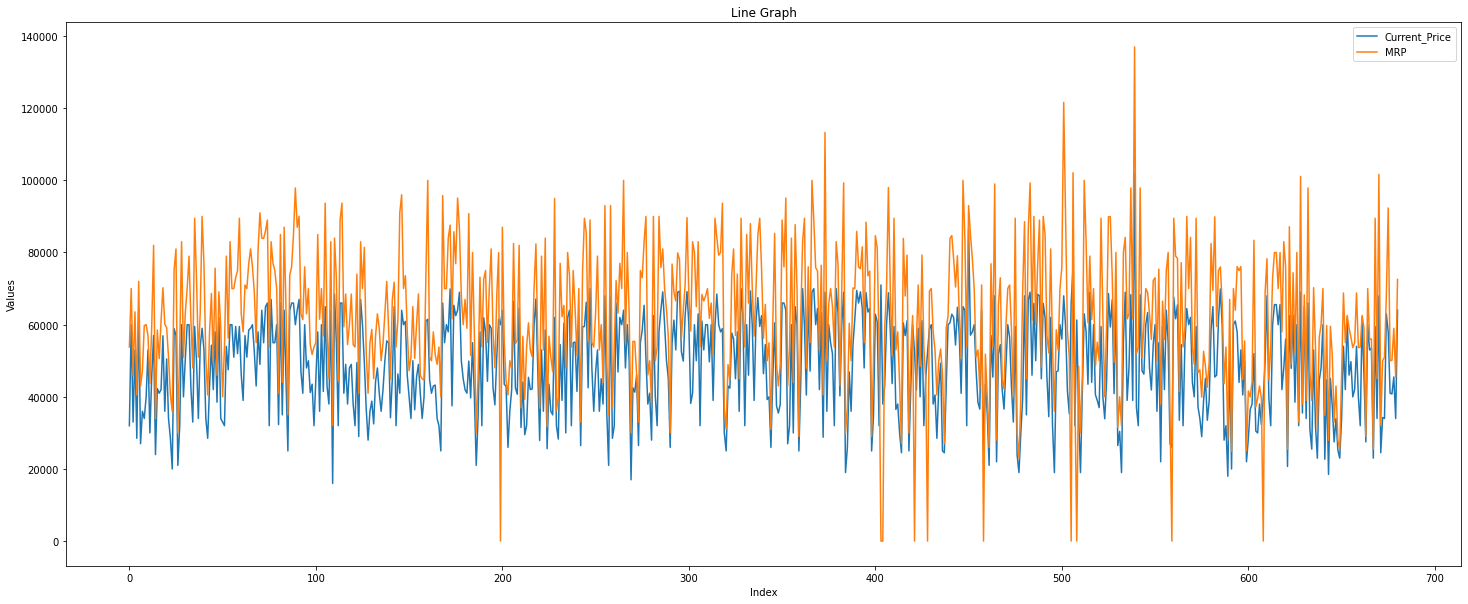

In [ ]:
# Selecting the columns for the line graph
cols = ['Current_Price', 'MRP']

# Creating a line graph
data[cols].plot(figsize=(25, 10))

# Set axis labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Graph')
plt.show()

### If we compare the above graph we can see that the MRP of laptops are too high then the Current price.

### Checking the correlation between the numerical columns of the dataset using heatmap.

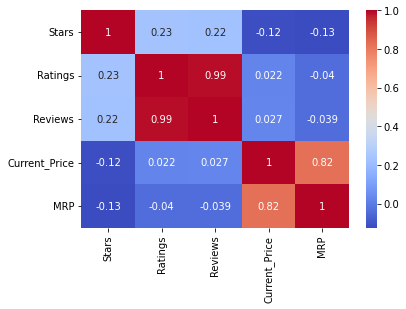

In [ ]:
# Checking the correlation between numerical variables
corr = data.corr()

# Creating a heatmap of the correlation.
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Creating a new discount column using the MRP and Current Price.

In [ ]:
# Creating a new column "Discount"
data['Discount'] = data['MRP'] - data['Current_Price']
data.head(5)

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Processor,Ram,Storage,Discount
0,Lenovo IdeaPad 3 Core i3 10th Gen,4.3,8,0,31990,53790,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD,21800
1,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),10009
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,13000
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,10549
4,Lenovo Intel Celeron Dual Core,4.1,366,35,28490,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,12000


### Finding the top 10 products using the Product Name and the Stars.

In [ ]:
# sorting the Dataset by 'Stars' column in descending order
data_sorted = data.sort_values(by='Stars', ascending=False)

# selecting the top 10 products based on 'Stars' and 'ProductName'column
top_10_products = data_sorted.head(10)[['ProductName', 'Stars']]

top_10_products

,ProductName,Stars
349,Lenovo Core i3 10th Gen,5.0
335,Lenovo Core i3 10th Gen,5.0
66,HP Victus Ryzen 5 Hexa Core 5600H,5.0
124,ASUS Vivobook 14 (2022) Core i5 12th Gen,5.0
48,HP Pavilion Ryzen 5 Hexa Core 5625U,5.0
94,HP Victus Ryzen 5 Hexa Core 5600H,5.0
267,acer Aspire 5 Ryzen 7 Octa Core 5700U,5.0
78,ASUS Vivobook 16X Ryzen 5 Hexa Core R5,4.9
108,ASUS VivoBook Flip 14 Core i5 11th Gen,4.8
76,ASUS Vivobook 14 (2022) Core i5 12th Gen,4.8


### Finding the highest rating of the Flipkart Laptops using the rating column.

In [ ]:
data[data['Ratings'] == data['Ratings'].max()]

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Processor,Ram,Storage,Discount
637,ASUS Celeron Dual Core,3.7,17745,2300,22990,30990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,8000


# Train Test set
### Dropping the Product Name and Current Price from the X set as the Product name doesn't provide useful information and current price is dropped because it is the target variable that we are trying to predict.

In [ ]:
X = data.drop(['ProductName', 'Current_Price'], axis=1) # Drop irrelevant columns
y = data['Current_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### First we will create the numerical columns and categorical columns to find the Train and Test shape.
### Then we will create Preprocessing transformation for scaling the numerical columns using the Standard Scaler, and the categorical columns using the OneHotencoding and we will also import the column_transformer library to transform the testing data.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Defining the numerical and categorical columns
num_cols = ['MRP', 'Ratings', 'Stars', 'Reviews', 'Discount']
cat_cols = ['Processor', 'Ram', 'Storage']

# Creating the preprocessor
preprocessor = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(handle_unknown='ignore'), cat_cols)
)

# Fit and transform the preprocessor on the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transforming the testing data using the preprocessor fitted on the training data
X_test_processed = preprocessor.transform(X_test)

print(f'Training data shape: {X_train_processed.shape}')
print(f'Testing data shape: {X_test_processed.shape}')


Training data shape: (544, 115)
Testing data shape: (137, 115)


# Feature engineering

### Creating a new Column using the RAM and the storage columns as these columns are not so important in our Flipkart Dataset. So, we will store the values of both the columns in a new column name "Memory" and we will drop both the columns.

In [ ]:
# Combining the 'RAM' and 'Storage' columns to create a new 'Memory' column
data['Memory'] = data['Ram'] + ' ' + data['Storage']

# Converting the 'Memory' column to a categorical variable
data['Memory'] = data['Memory'].astype('category')

# Dropping the 'Ram' and 'Storage' columns
data.drop(['Ram', 'Storage'], axis=1, inplace=True)
print(data.head())


                                    ProductName  Stars  Ratings  Reviews  \
0             Lenovo IdeaPad 3 Core i3 10th Gen    4.3        8        0   
1  realme Book(Slim) Intel Evo Core i5 11th Gen    4.4     7067      949   
2      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3     9970      999   
3          HP Pavilion Ryzen 5 Hexa Core AMD R5    4.4    11854     1199   
4                Lenovo Intel Celeron Dual Core    4.1      366       35   

   Current_Price    MRP                                        Processor  \
0          31990  53790               Intel Core i3 Processor (10th Gen)   
1          59990  69999  Powered by 11th Gen Intel Evo Core i5 Processor   
2          32990  45990               Intel Core i3 Processor (10th Gen)   
3          52990  63539                  AMD Ryzen 5 Hexa Core Processor   
4          28490  40490                Intel Celeron Dual Core Processor   

   Discount                                             Memory  
0     21800          

### Changing the values of the Discount column by converting the values into percentage for all the Flipkart Laptop Products.

In [ ]:
# Creating a new 'Discount_Percentage' column
data['Discount'] = ((data['MRP'] - data['Current_Price']) / data['MRP']) * 100
print(data.head())


                                    ProductName  Stars  Ratings  Reviews  \
0             Lenovo IdeaPad 3 Core i3 10th Gen    4.3        8        0   
1  realme Book(Slim) Intel Evo Core i5 11th Gen    4.4     7067      949   
2      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3     9970      999   
3          HP Pavilion Ryzen 5 Hexa Core AMD R5    4.4    11854     1199   
4                Lenovo Intel Celeron Dual Core    4.1      366       35   

   Current_Price    MRP                                        Processor  \
0          31990  53790               Intel Core i3 Processor (10th Gen)   
1          59990  69999  Powered by 11th Gen Intel Evo Core i5 Processor   
2          32990  45990               Intel Core i3 Processor (10th Gen)   
3          52990  63539                  AMD Ryzen 5 Hexa Core Processor   
4          28490  40490                Intel Celeron Dual Core Processor   

    Discount                                             Memory  
0  40.527979        

### Creating a scatter plot using the Current Price and MRP. We have a lots of values from price range 20000-100000. We also have some outliers.

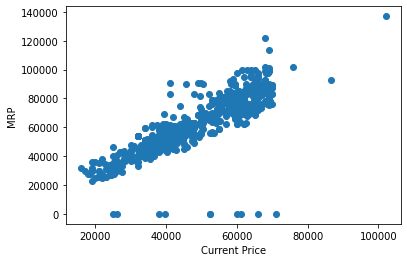

In [ ]:
import matplotlib.pyplot as plt

# Creating a scatter plot using  'Current_Price' and 'MRP'
plt.scatter(data['Current_Price'], data['MRP'])
plt.xlabel('Current Price')
plt.ylabel('MRP')
plt.show()


# Modelling
### We will find the Model Score using the Linear regression and the data we have preprocessed above.

In [ ]:
from sklearn.linear_model import LinearRegression

# Defining the model
model = LinearRegression()

# Fit the model on the preprocessed training data
model.fit(X_train_processed, y_train)

# Predicting on the preprocessed testing data
y_pred = model.predict(X_test_processed)

# Evaluating the model
score = model.score(X_test_processed, y_test)
print(f'Model score: {score}')


Model score: 0.9999999997240547


### Finding the Best score and hyperparameters using the necessary libraries such as the GridSearchCV, KNN, StandardScaler and Pipeline.
### We will define a Pipeline with the KNN regressor. We will create a parameter grid by defining the regressor neighbors and weights and then we will cross validate the X and Y train to get the Best score and Hyperparameter. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


# Defining the pipeline with the preprocessor and a KNN regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', KNeighborsRegressor())
])

# Defining the hyperparameter grid
param_grid = {
    'regressor__n_neighbors': [5, 10, 15],
    'regressor__weights': ['uniform', 'distance']
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Printing the best score and hyperparameters
print(f'Best score: {grid_search.best_score_:.3f}')
print(f'Best hyperparameters: {grid_search.best_params_}')


Best score: 0.832
Best hyperparameters: {'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}


# Model Evaluation

### We have already fit the linear regression model to the training data and also the prediction on the testing data so now we will import the r2_score library to get the score of R-square.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9999999997240547


###Here we will import the mean_squared_error library to calculate the mean-square-error by using the y_test and y_pred.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.05216537041147987


# Logistic Regression
### Importing the Logistic regression and the accuracy score to find the test accuracy of Logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Defining the logistic regression model with preprocessor
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Test accuracy: {accuracy:.3f}')


Logistic Regression Test accuracy: 0.168


# Conclusion
### The above analysis suggests that the 'Current_Price', 'MRP', 'Ratings', and 'Stars' are the most important factors in determining the price of laptops on Flipkart.

### Based on the analysis of the Flipkart laptops dataset, there are a few recommendations that can be made to boost sales:

### 1. Providing Discounts: From the analysis, we saw that the discount offered can influence the sale of the product. Therefore, offering discounts can be a great way to boost sales.

### 2. Reducing MRP: From the analysis, we saw that the current price of the Laptops in the Market are cheaper than the MRP which is almost half the price higher. Therefore, by reducing the Maximum retail price Flipkart can be able to boost more sales.

### Overall, by offering discounts, and reducing the MRP will help Flipkart potentially increase their sales and attract more customers.

In [ ]:
%%shell
jupyter nbconvert --to html your path.ipynb